In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

# Load data
df = pd.read_json('data/wine-data.json')

In [ ]:
df.head()

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,87,Nicosia 2013 Vulkà Bianco (Etna),"Aromas include tropical fruit, broom, brimston...",Kerin O’Keefe,@kerinokeefe,NaN,Vulkà Bianco,White Blend,Etna,None,Sicily & Sardinia,Italy,Nicosia
1,87,Quinta dos Avidagos 2011 Avidagos Red (Douro),"This is ripe and fruity, a wine that is smooth...",Roger Voss,@vossroger,15.0,Avidagos,Portuguese Red,None,None,Douro,Portugal,Quinta dos Avidagos
2,87,Rainstorm 2013 Pinot Gris (Willamette Valley),"Tart and snappy, the flavors of lime flesh and...",Paul Gregutt,@paulgwine,14.0,None,Pinot Gris,Willamette Valley,Willamette Valley,Oregon,US,Rainstorm
3,87,St. Julian 2013 Reserve Late Harvest Riesling ...,"Pineapple rind, lemon pith and orange blossom ...",Alexander Peartree,None,13.0,Reserve Late Harvest,Riesling,Lake Michigan Shore,None,Michigan,US,St. Julian
4,87,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,"Much like the regular bottling from 2012, this...",Paul Gregutt,@paulgwine,65.0,Vintner's Reserve Wild Child Block,Pinot Noir,Willamette Valley,Willamette Valley,Oregon,US,Sweet Cheeks


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   points                 129971 non-null  int64  
 1   title                  129971 non-null  object 
 2   description            129971 non-null  object 
 3   taster_name            103727 non-null  object 
 4   taster_twitter_handle  98758 non-null   object 
 5   price                  120975 non-null  float64
 6   designation            92506 non-null   object 
 7   variety                129970 non-null  object 
 8   region_1               108724 non-null  object 
 9   region_2               50511 non-null   object 
 10  province               129908 non-null  object 
 11  country                129908 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [5]:
df.isnull().sum()

points                       0
title                        0
description                  0
taster_name              26244
taster_twitter_handle    31213
price                     8996
designation              37465
variety                      1
region_1                 21247
region_2                 79460
province                    63
country                     63
winery                       0
dtype: int64

In [6]:
df = df[['country', 'points', 'price', 'variety', 'winery', 'province', 'region_1']]

In [7]:
df = df.dropna(subset=['points', 'price'])

In [8]:
# Convert points to int
df['points'] = df['points'].astype(int)

# Convert price to float
df['price'] = df['price'].astype(float)

In [9]:
# Handling outliers
df['price'].describe()

count    120975.000000
mean         35.363389
std          41.022218
min           4.000000
25%          17.000000
50%          25.000000
75%          42.000000
max        3300.000000
Name: price, dtype: float64

In [10]:
# Reproducibility seed
np.random.seed(42)

# Randomly sample 5000
sample_df = df.sample(n=5000)

## Total numer of wines

In [11]:
print("Total number of wines:", len(sample_df))

Total number of wines: 5000


### Average Points and Price

In [12]:
print("Average points:", round(sample_df['points'].mean(), 2))
print("Average price:", round(sample_df['price'].mean(), 2))

Average points: 88.4
Average price: 35.53


### Points and Price Ranges

In [13]:
print("Points range:", sample_df['points'].min(), "to", sample_df['points'].max())
print("Price range:", sample_df['price'].min(), "to", sample_df['price'].max())

Points range: 80 to 99
Price range: 6.0 to 1900.0


## Distribution Analysis

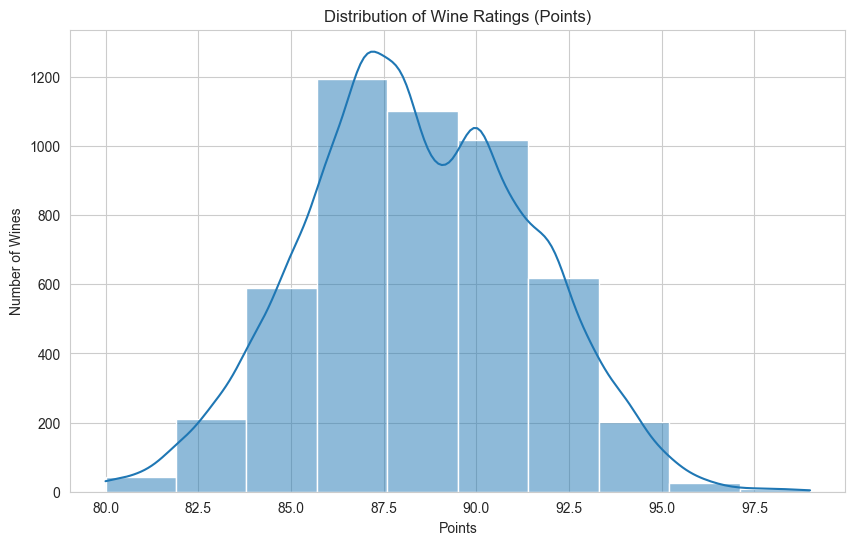

In [14]:
# Points Distribution
plt.figure(figsize=(10,6))
sns.histplot(sample_df['points'], bins=10, kde=True)
plt.title('Distribution of Wine Ratings (Points)')
plt.xlabel('Points')
plt.ylabel('Number of Wines')
plt.show()

### Price Distribution

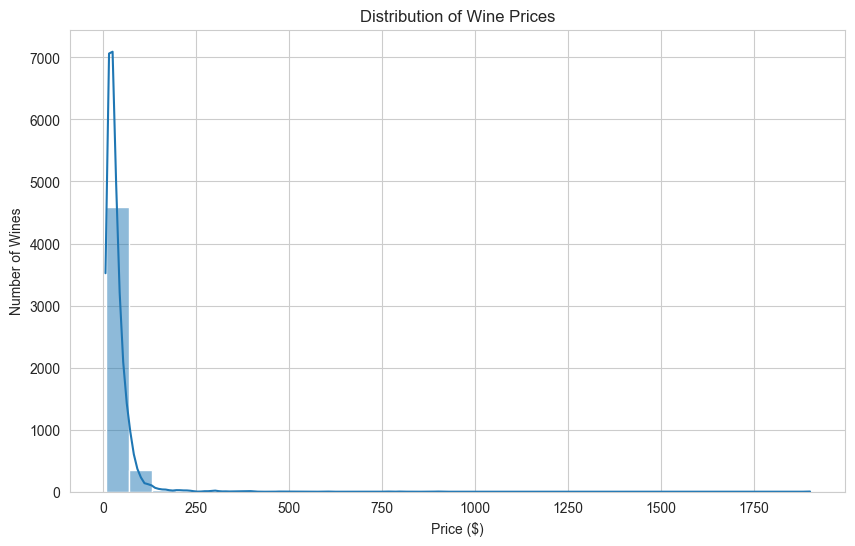

In [15]:
# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(sample_df['price'], bins=30, kde=True)
plt.title('Distribution of Wine Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Wines')
plt.show()

## Relationship between points and price

#### Scatter Plot

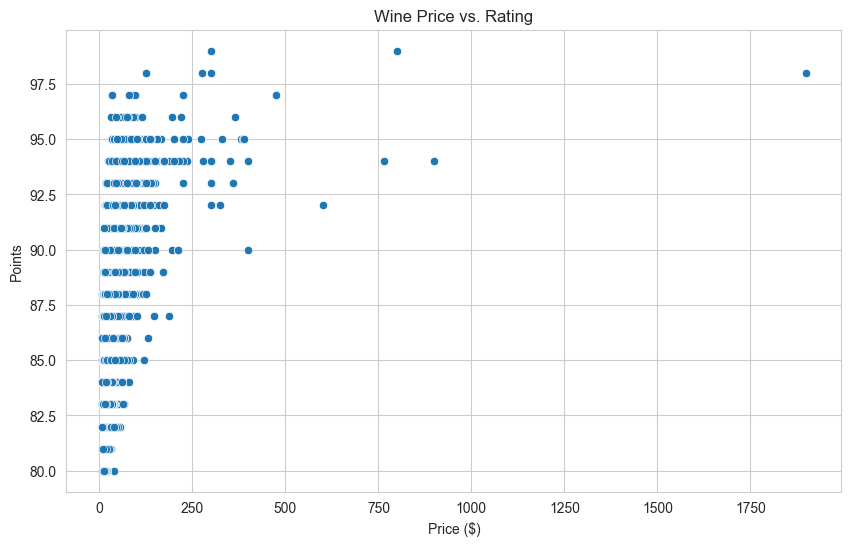

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='price', y='points', data=sample_df)
plt.title('Wine Price vs. Rating')
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.show()

#### Correlation Coeficient

In [17]:
correlation = sample_df['price'].corr(sample_df['points'])
print("Correlation between price and points:", round(correlation,4))

Correlation between price and points: 0.3921


#### Regression Line

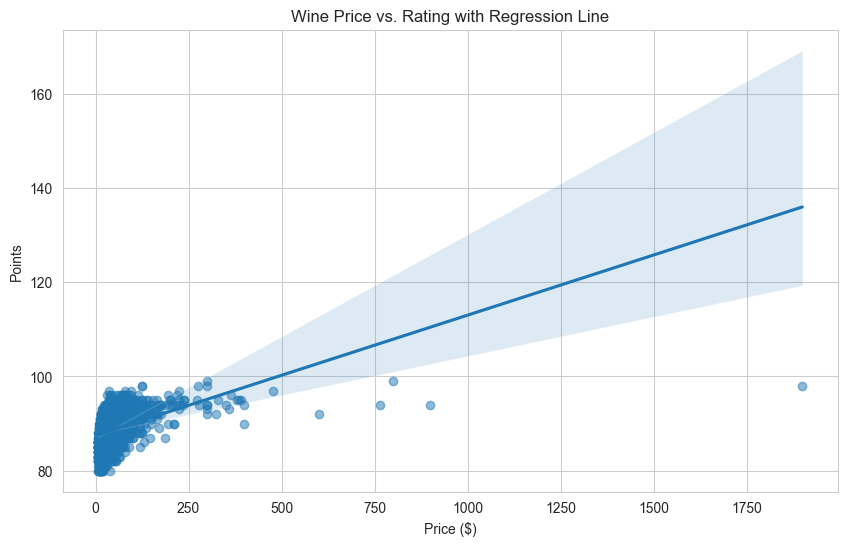

In [18]:
plt.figure(figsize=(10,6))
sns.regplot(x='price', y='points', data=sample_df, scatter_kws={'alpha':0.5})
plt.title('Wine Price vs. Rating with Regression Line')
plt.xlabel('Price ($)')
plt.ylabel('Points')
plt.show()

## Top Countries by Wine Count

In [19]:
top_countries = sample_df['country'].value_counts().head(10)
print("Top 10 Countries by Number of Wines:")
print(top_countries)

Top 10 Countries by Number of Wines:
country
US           2255
France        731
Italy         696
Spain         286
Portugal      186
Chile         174
Argentina     157
Austria       103
Australia      97
Germany        94
Name: count, dtype: int64


#### Bar Plot

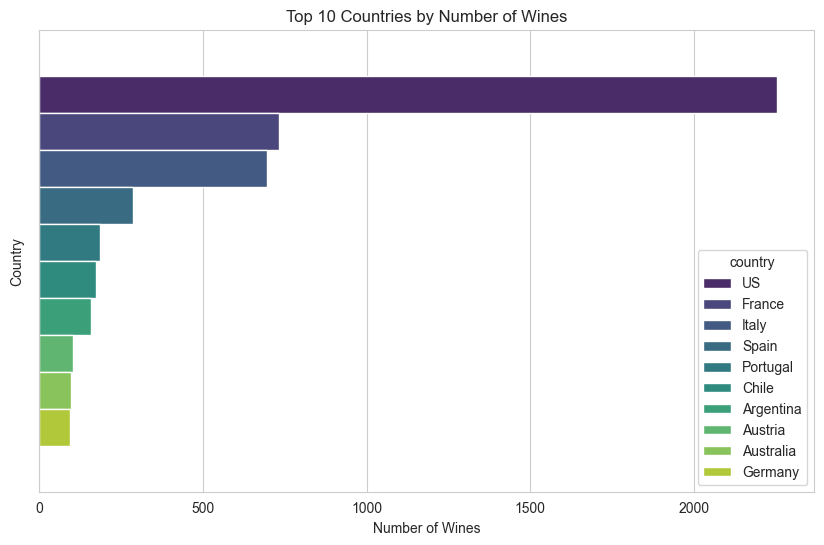

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, palette='viridis', orient='h', hue=top_countries.index)
plt.title('Top 10 Countries by Number of Wines')
plt.xlabel('Number of Wines')
plt.ylabel('Country')
plt.show()